In [315]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

## Reading & Normalizing Data

In [504]:

def minMaxScale(df):
    columns = ['High','Low','Volume']
    min_max_scaler = preprocessing.MinMaxScaler()
    normDf = df.copy()
    normDf[columns] = pd.DataFrame(min_max_scaler.fit_transform(normDf[columns]))
    return normDf



def readStock(filename):
    basePath = "/Users/shreya/dev/PROJECT_1/Finance_group_project/Resources/"
    filePath = basePath+filename
    df = pd.read_csv(filePath).dropna()
    df['Date'] = pd.to_datetime(df['Date'])
    df1 = df[['Date','High','Low','Volume']]
    

    return minMaxScale(df1)



In [505]:
fordDf = readStock("Ford.csv")
gmDf= readStock("GM.csv")
mahindraDf= readStock("M&M.NS.csv")
marutiDf= readStock("MARUTI.NS.csv")
mercedesDf= readStock("MARUTI.NS.csv")
stlaDf= readStock("STLA.csv")
tataMotorsDf= readStock("TATAMOTORS.csv")
toyotaDf= readStock("Toyota.csv")
teslaDf = readStock("TSLA.csv")
vow3Df= readStock("VOW3.DE.csv")

In [506]:
fordDf.head(10)

,Date,High,Low,Volume
0,2013-01-02,0.413054,0.442920,0.223784
1,2013-01-03,0.432634,0.445370,0.374876
2,2013-01-04,0.428438,0.460069,0.156120
3,2013-01-07,0.427040,0.460069,0.119381
4,2013-01-08,0.420047,0.452719,0.128753
5,2013-01-09,0.427972,0.462028,0.098008
6,2013-01-10,0.443823,0.476237,0.255341
7,2013-01-11,0.449883,0.487016,0.198716
8,2013-01-14,0.450350,0.485056,0.128387
9,2013-01-15,0.460606,0.486526,0.158600


## Concating the Companies 

In [507]:
AutoMobile_df = pd.concat([fordDf,gmDf,mahindraDf,mercedesDf,stlaDf,
                          tataMotorsDf,toyotaDf,teslaDf,vow3Df])

In [508]:
AutoMobile_df.head(10)

,Date,High,Low,Volume
0,2013-01-02,0.413054,0.442920,0.223784
1,2013-01-03,0.432634,0.445370,0.374876
2,2013-01-04,0.428438,0.460069,0.156120
3,2013-01-07,0.427040,0.460069,0.119381
4,2013-01-08,0.420047,0.452719,0.128753
5,2013-01-09,0.427972,0.462028,0.098008
6,2013-01-10,0.443823,0.476237,0.255341
7,2013-01-11,0.449883,0.487016,0.198716
8,2013-01-14,0.450350,0.485056,0.128387
9,2013-01-15,0.460606,0.486526,0.158600


In [509]:
AutoMobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22688 entries, 0 to 2549
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    22688 non-null  datetime64[ns]
 1   High    22684 non-null  float64       
 2   Low     22684 non-null  float64       
 3   Volume  22684 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 886.2 KB


In [510]:
AutoMobile_df.describe()

,High,Low,Volume
count,22684.000000,22684.000000,22684.000000
mean,0.384269,0.402653,0.107928
std,0.229896,0.231731,0.092069
min,0.000000,0.000000,0.000000
25%,0.215771,0.235171,0.050057
50%,0.360101,0.393718,0.083877
75%,0.537641,0.556933,0.137678
max,1.000000,1.000000,1.000000


In [511]:
AutoMobile_df

,Date,High,Low,Volume
0,2013-01-02,0.413054,0.442920,0.223784
1,2013-01-03,0.432634,0.445370,0.374876
2,2013-01-04,0.428438,0.460069,0.156120
3,2013-01-07,0.427040,0.460069,0.119381
4,2013-01-08,0.420047,0.452719,0.128753
...,...,...,...,...
2545,2023-01-12,0.217445,0.283246,0.082273
2546,2023-01-13,0.209222,0.260798,0.167468
2547,2023-01-16,0.199941,0.266557,0.060403
2548,2023-01-17,0.201703,0.257272,0.102326


## Average per Day of Data using groupby

In [512]:
df_Auto = AutoMobile_df.groupby('Date')[['High','Low','Volume']].mean().dropna()

In [525]:
df_Auto

,High,Low,Volume
Date,,,
2013-01-01,0.102932,0.116431,0.032780
2013-01-02,0.213810,0.233270,0.122787
2013-01-03,0.216418,0.234956,0.126092
2013-01-04,0.215005,0.238389,0.094290
2013-01-07,0.213552,0.235734,0.076368
...,...,...,...
2023-01-12,0.510098,0.527184,0.107744
2023-01-13,0.493667,0.511290,0.137713
2023-01-16,0.664934,0.693683,0.044766


In [524]:
df_Auto.describe()

,High,Low,Volume
count,2608.000000,2608.000000,2608.000000
mean,0.385110,0.403638,0.107257
std,0.128876,0.127422,0.039404
min,0.075668,0.087173,0.000000
25%,0.302511,0.321810,0.081571
50%,0.349205,0.369837,0.099078
75%,0.465608,0.485888,0.124529
max,0.860334,0.859226,0.566253


## Ploting Graph Volume trading verse Date

(0.0, 0.7)

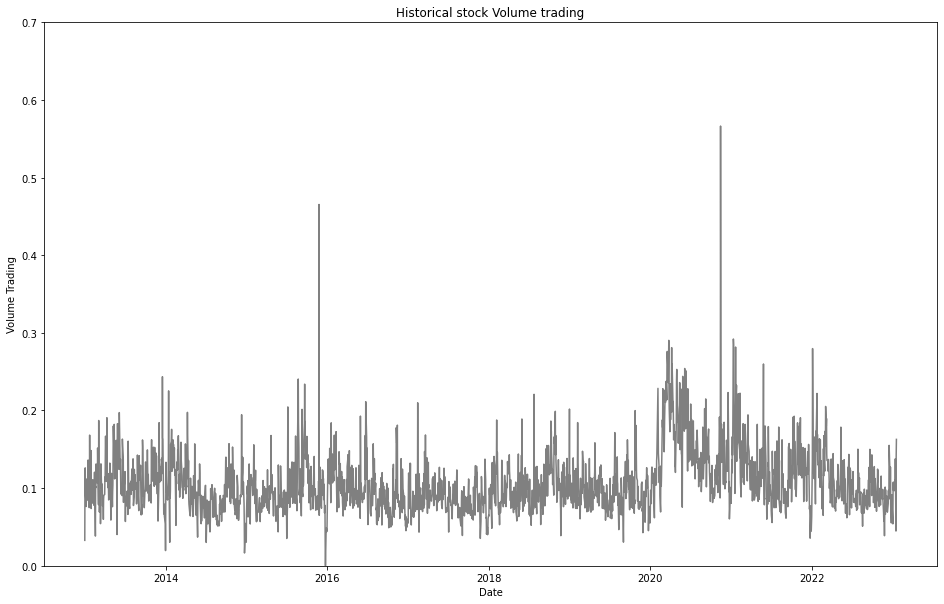

In [670]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_df.Volume, color='grey', linestyle= '-')
ax.set(title = "Historical stock Volume trading",
       xlabel = "Date",
       ylabel = "Volume Trading")


plt.ylim(0, 0.7)




In [527]:
df_Auto.to_csv('Scaled_Data_Averaged.csv', encoding='utf-8')

In [528]:
Sorted_df = df_Auto.sort_values(by=['Date'])
Sorted_df

,High,Low,Volume
Date,,,
2013-01-01,0.102932,0.116431,0.032780
2013-01-02,0.213810,0.233270,0.122787
2013-01-03,0.216418,0.234956,0.126092
2013-01-04,0.215005,0.238389,0.094290
2013-01-07,0.213552,0.235734,0.076368
...,...,...,...
2023-01-12,0.510098,0.527184,0.107744
2023-01-13,0.493667,0.511290,0.137713
2023-01-16,0.664934,0.693683,0.044766


(0.0, 1.0)

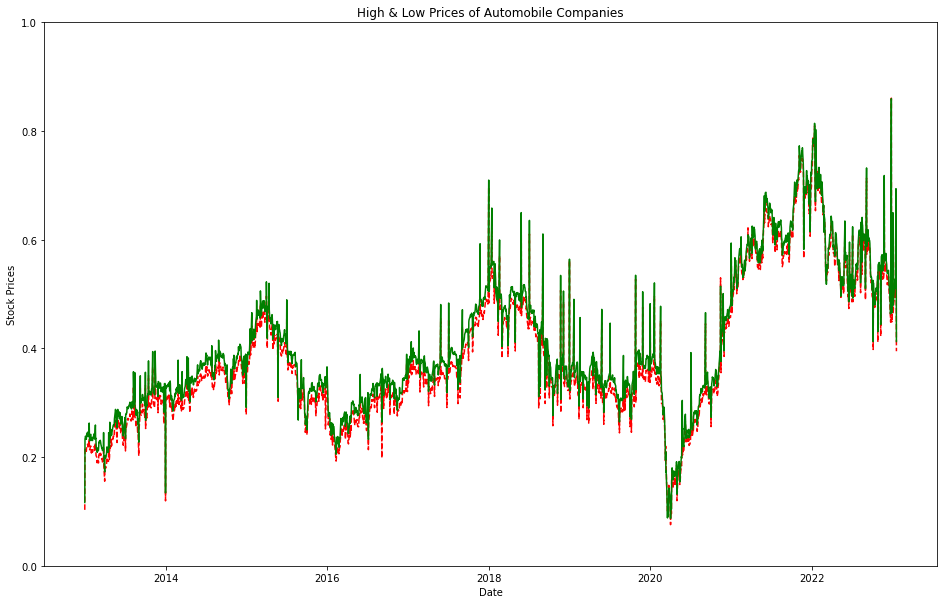

In [579]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_df.High, color='red', linestyle= '--')
ax.plot(Sorted_df.Low, color='green')
ax.set(title = "High & Low Prices of Automobile Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")


plt.ylim(0, 1)



## MultiLinear Regression Machine Learning Model

In [642]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [640]:
train_df = Sorted_df[(Sorted_df.index < '2023-01-01')]
X_train = train_df[['High','Low']]
y_train = train_df['Volume']


test_df = Sorted_df[(Sorted_df.index >= '2023-01-01')]
X_test = test_df[['High', 'Low']]
y_test = test_df['Volume']

  
print("TRAIN")
print("Y train Shape: " + str(y_train.shape))
print("X train Shape: " + str(X_train.shape))

print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))

TRAIN
Y train Shape: (2595,)
X train Shape: (2595, 2)

TEST
Y test Shape: (13,)
X test Shape: (13, 2)


In [643]:
model = LinearRegression()

In [644]:
model.fit(X_train, y_train)

LinearRegression()

## Model Validation

In [645]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 0.2162322161477662
Coefficients: [ 4.24920812 -4.32419058]


### Those values are the intercept and coefficients values of the models which can be put in mathematic equation as below:
### y=0.2162+4.2442X<sub>1</sub>-4.3192X<sub>2</sub>

In [649]:
r2 = model.score(X_train, y_train)
print("Model R2: " + str(r2))

Model R2: 0.44332697617228844


In [650]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [656]:

X = sm.add_constant(X_train) # adding a constant

olsmod = sm.OLS(y_train, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     1032.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:14:50   Log-Likelihood:                 5467.8
No. Observations:                2595   AIC:                        -1.093e+04
Df Residuals:                    2592   BIC:                        -1.091e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2162      0.003     75.081      0.0

In [657]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.44332697617228867


### Accuracy Assesment
### R² range between 0 and 1, where R²=0 means there are no linear relationship between the variables and R²=1 shows a perfect linear relationship. In our case, we got R² score about 0.442 which means 44.2% of our dependent variable can be explained using our independent variables.

## Make Future Predictions 

In [658]:
print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))


TEST
Y test Shape: (13,)
X test Shape: (13, 2)


In [680]:
Predictions = model.predict(X_test)

print("prediction shape: " + str(Predictions.shape))

prediction shape: (13,)


In [661]:
Pred_df=pd.DataFrame( {"Prediction": Predictions, "Actual": y_test})
Sorted_pred_df =Pred_df.sort_values(by=['Date'])
Sorted_pred_df

,Prediction,Actual
Date,,
2023-01-02,0.097278,0.053983
2023-01-03,0.113220,0.105264
2023-01-04,0.111580,0.107859
2023-01-05,0.116376,0.097042
2023-01-06,0.137502,0.102379
2023-01-09,0.103767,0.101437
2023-01-10,0.098066,0.096760
2023-01-11,0.094910,0.110032
2023-01-12,0.104099,0.107744


(0.0, 0.2)

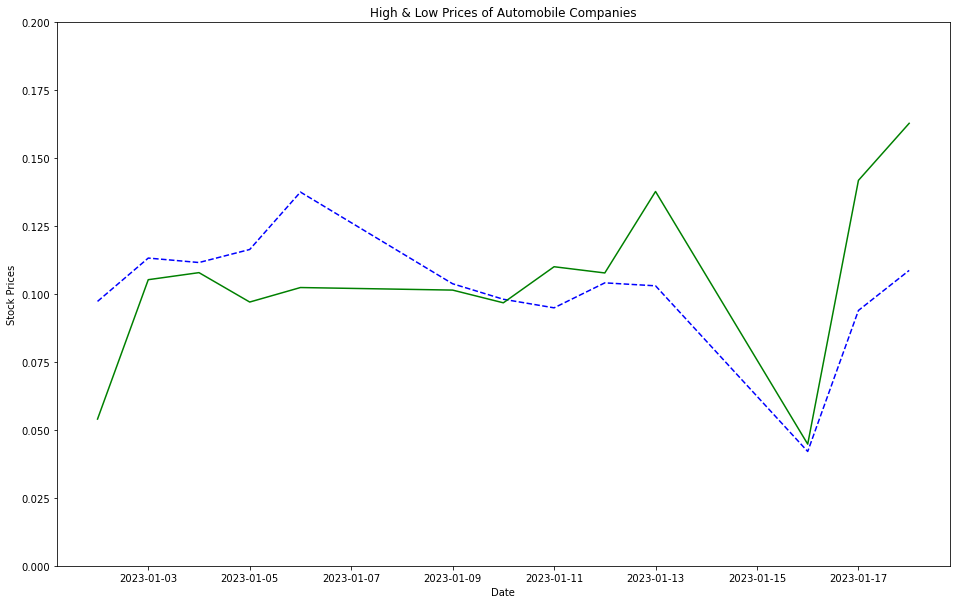

In [662]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_pred_df.Prediction, color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
ax.set(title = "High & Low Prices of Automobile Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")


plt.ylim(0, 0.2)



(0.0, 0.2)

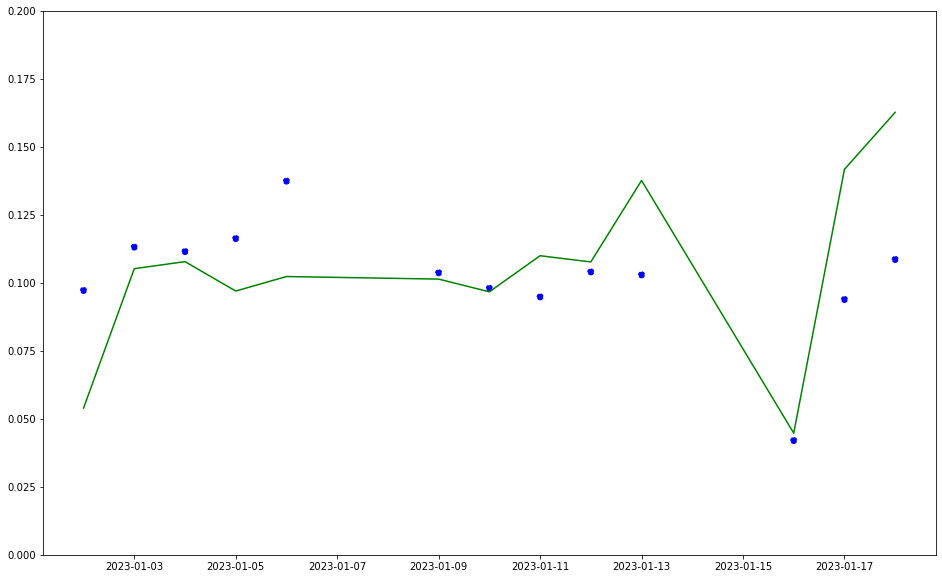

In [678]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(Sorted_pred_df.index,Sorted_pred_df.Prediction,color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
plt.ylim(0, 0.2)

In [665]:
r2 = model.score(X_test, y_test)

print("Prediction score: " + str(r2))

Prediction score: 0.15985009293187202
